In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sb

import scipy.stats as st
import sklearn.metrics as skm
import matplotlib.pyplot as plt


In [2]:
df_body = pd.read_pickle("results/demand/body_demand_experiment_perimg.pkl")
df_wing = pd.read_pickle("results/demand/wing_demand_experiment_perimg.pkl")

df_body["Depiction"] = "Body"
df_wing["Depiction"] = "Wing"

df = pd.concat([df_body, df_wing])
df["Training Method"] = df["train_method"].str.replace("ft", "fine-tuning").replace("tf", "transfer-learning")
df

,index,N_per_species,run,loss,accuracy,train_method,Depiction,Training Method
0,body_EffNetB0_fraction-10_run-0tf,10,0,1.440131,0.291667,tf,Body,transfer-learning
1,body_EffNetB0_fraction-10_run-0ft,10,0,1.388559,0.350000,ft,Body,fine-tuning
2,body_EffNetB0_fraction-10_run-1tf,10,1,1.344059,0.308333,tf,Body,transfer-learning
3,body_EffNetB0_fraction-10_run-1ft,10,1,1.264279,0.362500,ft,Body,fine-tuning
4,body_EffNetB0_fraction-10_run-2tf,10,2,1.383753,0.270833,tf,Body,transfer-learning
...,...,...,...,...,...,...,...,...
59,wing_EffNetB0_fraction-240_run-1ft,240,1,0.527807,0.820833,ft,Wing,fine-tuning
60,wing_EffNetB0_fraction-240_run-2tf,240,2,0.773289,0.704167,tf,Wing,transfer-learning
61,wing_EffNetB0_fraction-240_run-2ft,240,2,0.494138,0.808333,ft,Wing,fine-tuning
62,wing_EffNetB0_fraction-240_run-3tf,240,3,0.833861,0.670833,tf,Wing,transfer-learning


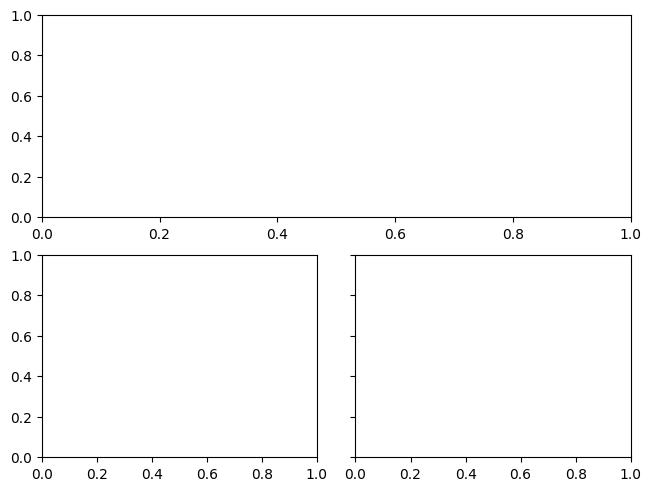

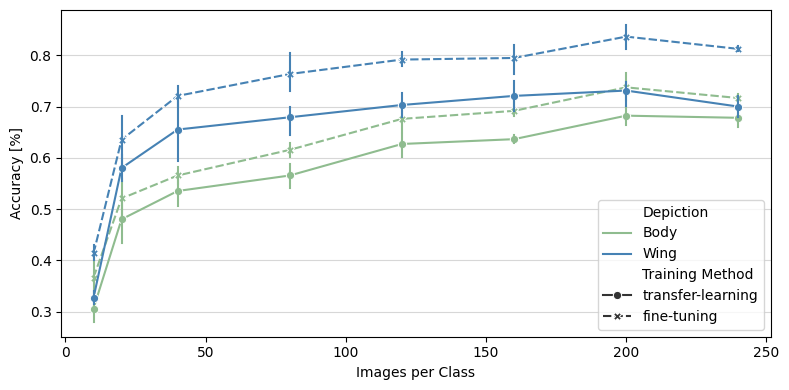

In [21]:
fig, ax = plt.subplots(1, figsize=(8,4))

sb.lineplot(df,
            x="N_per_species",
            y="accuracy",
            hue="Depiction",
            style="Training Method",
            palette=["darkseagreen", "steelblue"],
            markers=True,
            err_style="bars", ax=ax)

ax.set_ylabel("Accuracy [%]")
ax.set_xlabel("Images per Class")
ax.grid(axis="y", alpha=0.5)

plt.tight_layout()
plt.savefig("figures/training_demand.svg", dpi=300)

In [47]:
wing_ft = np.array(df.loc[(df["Depiction"] == "Wing") & (df["Training Method"] == "fine-tuning")]
               .groupby(["N_per_species"])["accuracy"].mean())
body_ft = np.array(df.loc[(df["Depiction"] == "Body") & (df["Training Method"] == "fine-tuning")]
               .groupby(["N_per_species"])["accuracy"].mean())
diff_ft = wing_ft - body_ft

In [48]:
wing_tl = np.array(df.loc[(df["Depiction"] == "Wing") & (df["Training Method"] == "transfer-learning")]
               .groupby(["N_per_species"])["accuracy"].mean())
body_tl = np.array(df.loc[(df["Depiction"] == "Body") & (df["Training Method"] == "transfer-learning")]
               .groupby(["N_per_species"])["accuracy"].mean())
diff_tl = wing_tl - body_tl

In [46]:
df["N_per_species"].unique()

array([ 10,  20,  40,  80, 120, 160, 200, 240])

In [55]:
diff_tl

array([0.02083334, 0.09999999, 0.11979166, 0.11354165, 0.0760417 ,
       0.08437501, 0.04895833, 0.02187501])

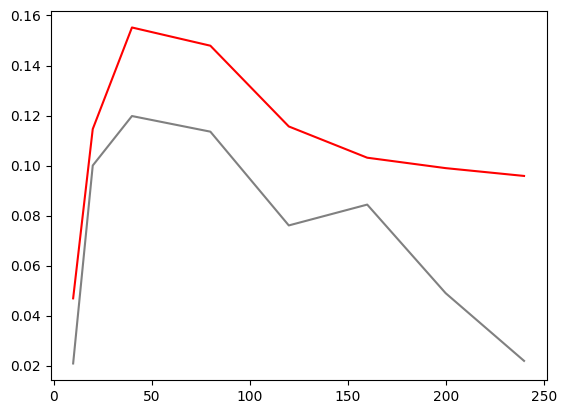

In [53]:
fig, ax = plt.subplots(1)
ax.plot(df["N_per_species"].unique(), diff_tl, color="grey")
ax.plot(df["N_per_species"].unique(), diff_ft, color="red")